# Grad-CAM
***


*   Ejemplo obtenido de la documentación de [tf-keras-vis](https://keisen.github.io/tf-keras-vis-docs/examples/attentions.html#GradCAM)





# Bibliotecas necesarias

In [1]:
! pip install tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

Tensorflow recognized 1 GPUs


# Cargando modelo VGG16
***

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

model = Model(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 4s 0us/step


# Imágenes de prueba

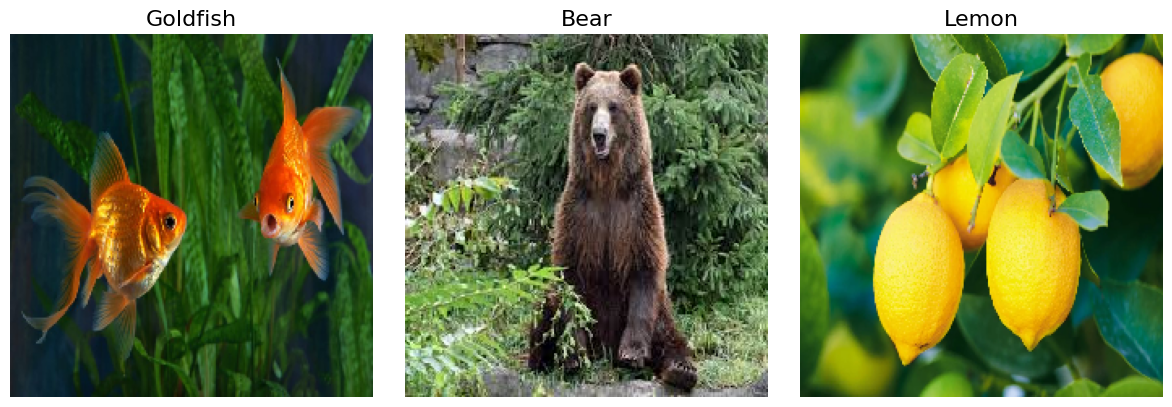

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Título de las imágenes
image_titles = ['Goldfish', 'Bear', 'Lemon']

# Cargar las imágenesá y transformarlas a arreglos de numpy
img1 = load_img('/content/gdrive/MyDrive/00_XAI_Curso/datos_XAI/images/Goldfish.jpeg', target_size=(224, 224))
img2 = load_img('/content/gdrive/MyDrive/00_XAI_Curso/datos_XAI/images/bear.JPEG', target_size=(224, 224))
img3 = load_img('/content/gdrive/MyDrive/00_XAI_Curso/datos_XAI/images/lemons-tree.jpg', target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preprocesamiento de los datos para entrar a VGG16
X = preprocess_input(images)

# Mostrando imágenes
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()


# Usando módulo *tf_keras_vis*
## Saliency Maps

In [7]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

In [8]:
from tf_keras_vis.utils.scores import CategoricalScore

# 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
score = CategoricalScore([1, 294, 951])


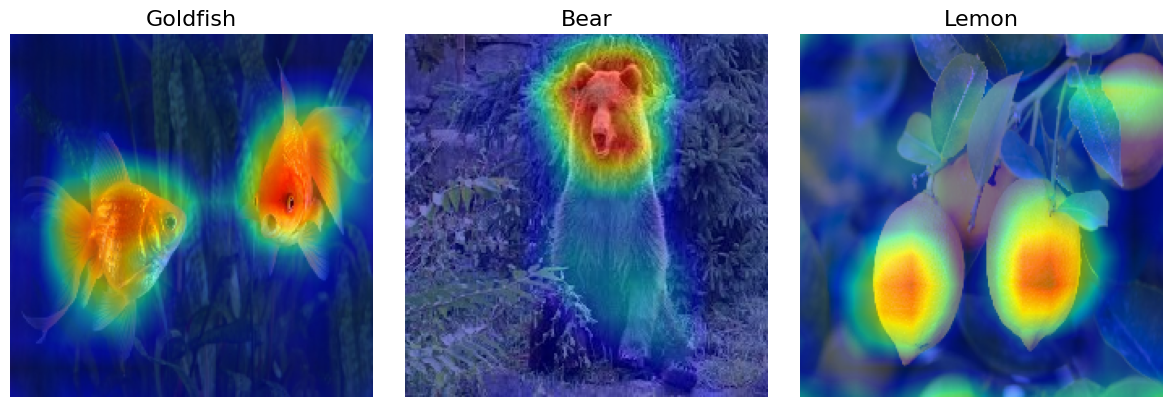

CPU times: user 5.65 s, sys: 1.56 s, total: 7.21 s
Wall time: 13.8 s


In [9]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              X,
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()